In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split

# Ensemble
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Read the Clean CSV

In [3]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1_Clean.csv')
df = pd.read_csv(file_path)
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


# Split the Data into Training and Testing

In [4]:
# Create our features
df_encoded = pd.get_dummies(df)
X = df_encoded.drop(["loan_status_low_risk", "loan_status_high_risk"], axis=1)

# Create our target
y = df[["loan_status"]]

In [5]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,issue_d_Mar-2019,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.177238,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.381873,0.0,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637,0.0,0.0
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [6]:
# Check the balance of our target values
y['loan_status'].value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Ensemble Learners

Compare two ensemble algorithms to determine which algorithm results in the best performance. Train a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier . For each algorithm, complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [8]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model.fit(X_train, y_train)
brf_y_pred = brf_model.predict(X_test)

In [9]:
# Calculated the balanced accuracy score
brf_ba_score = balanced_accuracy_score(y_test, brf_y_pred)
brf_ba_score

0.7877672625306695

In [10]:
# Display the confusion matrix
brf_cm = confusion_matrix(y_test, brf_y_pred)
brf_cm_df = pd.DataFrame(brf_cm, columns=['Predicted False (High-Risk)', 'Predicted True (Low-Risk)'],
                        index=['Actual False (High-Risk)', 'Actual True (Low-Risk)'])
brf_cm_df

,Predicted False (High-Risk),Predicted True (Low-Risk)
Actual False (High-Risk),58,29
Actual True (Low-Risk),1560,15558


In [11]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, brf_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.67      0.91      0.07      0.78      0.59        87
   low_risk       1.00      0.91      0.67      0.95      0.78      0.62     17118

avg / total       0.99      0.91      0.67      0.95      0.78      0.62     17205



In [12]:
# List the features sorted in descending order by feature importance
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.07376667607601396, 'total_rec_prncp'),
 (0.06390324452717588, 'total_rec_int'),
 (0.06073336071656837, 'total_pymnt_inv'),
 (0.05811195697921674, 'total_pymnt'),
 (0.04951778391272079, 'last_pymnt_amnt'),
 (0.02458051789018817, 'int_rate'),
 (0.020398879691407974, 'out_prncp'),
 (0.018625883307901298, 'dti'),
 (0.018378884967316288, 'max_bal_bc'),
 (0.017480030880564042, 'issue_d_Jan-2019'),
 (0.01698703048268034, 'installment'),
 (0.01661321625916749, 'annual_inc'),
 (0.01623198470200134, 'bc_util'),
 (0.015821923028819504, 'mths_since_recent_inq'),
 (0.015385686591272854, 'total_bc_limit'),
 (0.015337070167127763, 'out_prncp_inv'),
 (0.01506649550412446, 'avg_cur_bal'),
 (0.014926455495755147, 'issue_d_Mar-2019'),
 (0.014924489307566175, 'revol_bal'),
 (0.014583210727445232, 'mo_sin_old_rev_tl_op'),
 (0.01428231366275729, 'total_bal_ex_mort'),
 (0.014238473969302518, 'tot_cur_bal'),
 (0.014067369111282934, 'mo_sin_old_il_acct'),
 (0.01351439379612201, 'total_bal_il'),
 (0.0133438

### Easy Ensemble AdaBoost Classifier

In [13]:
# Train the EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators = 100, random_state = 1)
eec.fit(X_train, y_train)
eec_y_pred = eec.predict(X_test)

In [14]:
# DataFrame of Actual, Predicted
eec_pred_act_df = pd.DataFrame({'Predicted': eec_y_pred, 'Actual': y_test.loan_status})
eec_pred_act_df = eec_pred_act_df.reset_index(drop=True)
eec_pred_act_df.head()

,Predicted,Actual
0,high_risk,low_risk
1,low_risk,low_risk
2,low_risk,low_risk
3,low_risk,low_risk
4,high_risk,low_risk


In [15]:
# Calculated the balanced accuracy score
eec_ba_score = balanced_accuracy_score(y_test, eec_y_pred)
eec_ba_score

0.925427358175101

In [16]:
# Display the confusion matrix
eec_cm = confusion_matrix(y_test, eec_y_pred)
eec_cm_df = pd.DataFrame(eec_cm, columns=['Predicted False (High-Risk)', 'Predicted True (Low-Risk)'],
                        index=['Actual False (High-Risk)', 'Actual True (Low-Risk)'])
eec_cm_df

,Predicted False (High-Risk),Predicted True (Low-Risk)
Actual False (High-Risk),79,8
Actual True (Low-Risk),979,16139


In [17]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, eec_y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.07      0.91      0.94      0.14      0.93      0.85        87
   low_risk       1.00      0.94      0.91      0.97      0.93      0.86     17118

avg / total       0.99      0.94      0.91      0.97      0.93      0.86     17205



# Analysis

### ROC Curves

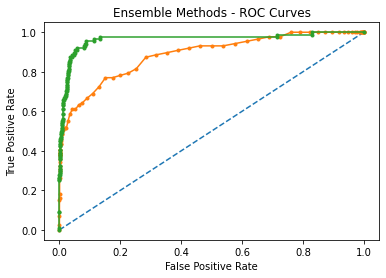

In [24]:
# ROC Curves

# Plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('Ensemble Methods - ROC Curves')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Balanced Random Forest (BRF)
# Retrieve probabilities for positive class
brf_proba = [row[0] for row in brf_model.predict_proba(X_test)]
# Calculate ROC curve for model
fpr, tpr, _ = roc_curve(y_test, brf_proba, pos_label='high_risk')
# Plot ROC
plt.plot(fpr, tpr, marker='.', label='BRF')
# Calculate AUC (Area Under Curve)
brf_roc_auc = 1 - roc_auc_score(y_test, brf_proba)

# Easy Ensemble AdaBoost (EEC)
eec_proba = [row[0] for row in eec.predict_proba(X_test)]
fpr, tpr, _ = roc_curve(y_test, eec_proba, pos_label='high_risk')
plt.plot(fpr, tpr, marker='.', label="EEC")
eec_roc_auc = 1 - roc_auc_score(y_test, eec_proba)

In [26]:
# Create DataFrame of each ensemble learning method's AUC Score
auc_df = pd.DataFrame({
    'Ensemble_Method': ['BRF', 'EEC'],
    'AUC_Score': [brf_roc_auc, eec_roc_auc]
})
# Sort DataFrame by descending AUC Scores
ranked_auc_df = auc_df.sort_values(by=['AUC_Score'], ascending=False)
ranked_auc_df = ranked_auc_df.reset_index(drop=True)
ranked_auc_df

,Ensemble_Method,AUC_Score
0,EEC,0.966215
1,BRF,0.887013
